# Ask Reddit

### Submitted by: Nikhil Agarwal (IMT2019060) and Divyanshi Rajput (IMT2019029)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("drive/My Drive/data/train.csv")
test = pd.read_csv("drive/My Drive/data/test.csv")

In [ ]:
# code to make dataset smaller
train = train.head(int(len(train)*(100/100)))
test = test.head(int(len(test)*(100/100)))

In [ ]:
# combine = train + test
combine = pd.concat([train, test])
combine.drop(columns = ["target"], inplace = True)

# Exploratory Data Analysis

In [ ]:
print(train.isna().sum())
print()
print(test.isna().sum())

qid              0
question_text    0
target           0
dtype: int64

qid              0
question_text    0
dtype: int64


### Target Class Distribution

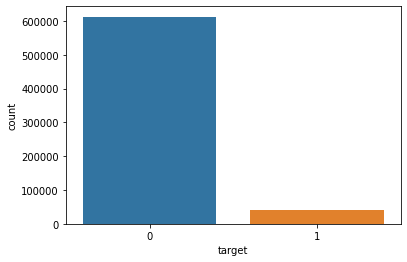

In [ ]:
sns.countplot(x = train["target"])
plt.show()

### Number of words in a question vs Frequency


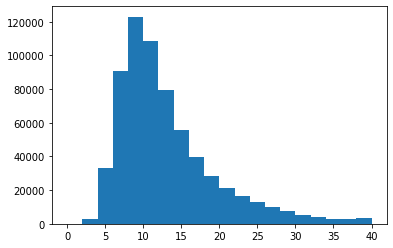

In [ ]:
plt.hist(x = train['question_text'].apply(lambda x: len(x.split())), range = [0,40], bins=20);

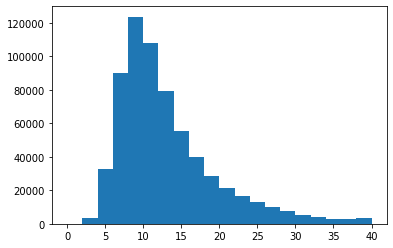

In [ ]:
plt.hist(x = test['question_text'].apply(lambda x: len(x.split())), range=[0,40], bins =20);

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 1.236526e+06,
        0.000000e+00, 5.828100e+04, 9.286000e+03, 0.000000e+00,
        1.509000e+03, 0.000000e+00, 3.660000e+02, 1.060000e+02,
        0.000000e+00, 2.600000e+01, 0.000000e+00, 1.000000e+01,
        3.000000e+00, 0.000000e+00, 3.000000e+00, 3.000000e+00]),
 array([-2. , -1.4, -0.8, -0.2,  0.4,  1. ,  1.6,  2.2,  2.8,  3.4,  4. ,
         4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <a list of 20 Patch objects>)

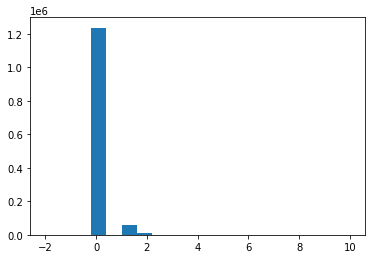

In [ ]:
plt.hist(x = combine['question_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()])), range=[-2, 10], bins=20)

## Preprocessing
- Remove stop words
- Stemming
- Remove punctuations
- Lowercase 
- Remove numbers and special characters

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop = list(ENGLISH_STOP_WORDS)

### Tokenisation
Converting sentence into list of words.

In [ ]:
def reg_token(x):
    # x = x.lower()
    tokenizer = RegexpTokenizer(r'[a-zA-Z@#$*!]+\**[a-zA-Z@#$*!]+')
    return tokenizer.tokenize(x)

In [ ]:
combine['question_text'] = combine['question_text'].apply(lambda x: reg_token(x))
train['question_text'] = train['question_text'].apply(lambda x: reg_token(x))
test['question_text'] = test['question_text'].apply(lambda x: reg_token(x))

# using word_tokenize
# combine['question_text'] = combine['question_text'].apply(lambda x: word_tokenize(x))
# train['question_text'] = train['question_text'].apply(lambda x: word_tokenize(x))
# test['question_text'] = test['question_text'].apply(lambda x: word_tokenize(x))

print(combine.head())

Removing punctuations from the sentence and converting it into lower case.

In [ ]:
combine['question_text'] = combine['question_text'].apply(lambda x: [word.lower() for word in x if word not in string.punctuation])
train['question_text'] = train['question_text'].apply(lambda x: [word.lower() for word in x if word not in string.punctuation])
test['question_text'] = test['question_text'].apply(lambda x: [word.lower() for word in x if word not in string.punctuation])

### Removing stop words and Stemming/lemmetization


In [ ]:
# STEMMING
# stemmer = PorterStemmer()

# combine["question_text"] = combine["question_text"].apply(lambda x: ' '.join([stemmer.stem(word) for word in x if word not in stop]))
# train["question_text"] = train["question_text"].apply(lambda x: ' '.join([stemmer.stem(word) for word in x if word not in stop]))
# test["question_text"] = test["question_text"].apply(lambda x: ' '.join([stemmer.stem(word) for word in x if word not in stop]))

# LEMMATIZATION
wnl = WordNetLemmatizer()

combine["question_text"] = combine["question_text"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x if word not in stop]))
train["question_text"] = train["question_text"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x if word not in stop]))
test["question_text"] = test["question_text"].apply(lambda x: ' '.join([wnl.lemmatize(word) for word in x if word not in stop]))

In [ ]:
# final preprocessed combine dataframe
combine

In [ ]:
# word cloud for words contributing towards troll questions
#Importing Libraries
from wordcloud import WordCloud

#Creating the text variable
troll_df = train[train['target'] == 1]
text = " ".join(question for question in troll_df.question_text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# code to upload preprocessed files to drive, so as to use it later. 
combine.to_csv('combine.csv', index = False)
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)
!cp combine.csv "drive/My Drive/data/preprocessed"
!cp train.csv "drive/My Drive/data/preprocessed"
!cp test.csv "drive/My Drive/data/preprocessed"

# to download files on local system uncomment these lines
# files.download('combine.csv')
# files.download('train.csv')
# files.download('test.csv')

## loading the preprocessed data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train = pd.read_csv("drive/My Drive/data/preprocessed/train.csv")
test = pd.read_csv("drive/My Drive/data/preprocessed/test.csv")
combine = pd.read_csv("drive/My Drive/data/preprocessed/combine.csv")

In [ ]:
print(combine.isna().sum())
print(train.isna().sum())
print(test.isna().sum())

In [ ]:
combine = combine[combine['question_text'].notna()]
print(combine.isna().sum())

train = train[train['question_text'].notna()]
print(train.isna().sum())

In [ ]:
# Assuming test data with NaN question_text to be not troll - set target to 0 for those ids
test_ids_with_null = test[test['question_text'].isnull()]['qid']
test_ids_with_null

## Bag of Words Approch

In [ ]:
corpus_combine = combine["question_text"].to_list()

### Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.sklearn_api import W2VTransformer

In [ ]:
# https://kavita-ganesan.com/how-to-use-countvectorizer/#.YayJCfHP3L9
# vectorizer = CountVectorizer(ngram_range = (1, 1), strip_accents = 'ascii' , min_df = 2)
# vectorizer = TfidfVectorizer(ngram_range = (1, 2), strip_accents = 'ascii' , min_df = 2)
vectorizer = CountVectorizer(ngram_range = (1, 3), min_df = 2)

# hyper parameter
# mn_df Eliminating words that appeared in less than 2 questions
# max_features=10
# binary=True

vectorizer.fit(corpus_combine)
list_of_words = vectorizer.get_feature_names()
print(len(list_of_words))

# Word Embeddings Approach

In [ ]:
# # word2vec

# from gensim.models import Word2Vec
# all_words = [nltk.word_tokenize(sent) for sent in corpus_combine]

# model = W2VTransformer(min_count = 2, size = 50)
# model.fit(all_words)

# corpus_train = train["question_text"].to_list()

# all_train_words = [nltk.word_tokenize(sent) for sent in corpus_train]
# for i in range(len(all_train_words)):
#   all_train_words[i] = [word for word in all_train_words[i] if word in model.gensim_model.wv.vocab ]

# X = pd.DataFrame(columns=[str(i) for i in range(100)])

# for i in range(len(all_train_words)):
#   vec = (np.mean(model.transform(all_train_words[i]), axis = 0))
#   if(i%100 == 0):
#     print(i)
#   X.loc[i] = vec

# Y = train['target']

In [ ]:
# code to download list of words in countvectorizer vocabulary
# dowload_df = pd.DataFrame(list_of_words, columns=["words"])
# dowload_df.to_csv('words.csv')
# files.download('words.csv')

In [ ]:
corpus_train = train["question_text"].to_list()
X = vectorizer.transform(corpus_train)

In [ ]:
Y = train["target"]

In [ ]:
print(X.shape)
print(Y.shape)

## Fitting Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.4, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report

In [ ]:
# # Grid CV search
# param_grid = {'class_weight' : [{0:1, 1 : 8}, {0: 1, 1: 7}, {0: 1, 1: 8.5}, {0: 1, 1: 7.5}, {0: 1, 1: 6}, {0:1 , 1:5}], 'max_iter' : [1000]}
              
# grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, scoring='f1_macro', verbose=10) 
   
# # fitting the model for grid search 
# grid.fit(X_train, Y_train) 
 
# # print best parameter after tuning 
# print(grid.best_params_) 
# ypred = grid.predict(X_valid) 

In [ ]:
clf = LogisticRegression(class_weight = {0:1, 1:1.5}, max_iter=1000, solver="lbfgs", penalty="l2").fit(X, Y)
ypred = clf.predict(X_valid)

In [ ]:
pred_proba_df = pd.DataFrame(clf.predict_proba(X_valid))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,.99]

for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred_df = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    Y_test_pred = Y_test_pred_df[1]
    test_accuracy = fbeta_score(Y_valid, Y_test_pred, average="macro", beta=0.5) 
    print('Our testing accuracy is {}'.format(test_accuracy))

In [ ]:
# XGB Classifier
# param_grid = {'max_depth':8, 'verbosity' : 3, 'learning_rate' : 0.1, 'n_estimators' : 240}
# clf = XGBClassifier()
# clf.set_params(**param_grid)
# clf.fit(X_train, Y_train)
# ypred = clf.predict(X_valid)

In [ ]:
# # Multi Layer Perceptron
# clf = MLPClassifier(random_state=1, max_iter=1).fit(X_train, Y_train)
# ypred = clf.predict(X_valid)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, confusion_matrix
from sklearn.metrics import classification_report

Y_test_pred_df = pred_proba_df.applymap(lambda x: 1 if x>=0.20 else 0)
ypred = Y_test_pred_df[1]
print("fbeta score: ",fbeta_score(Y_valid, ypred, average="macro", beta=0.5),"\n")
print("f1 score: ",f1_score(Y_valid, ypred),"\n")

# print classification report 
print(classification_report(Y_valid, ypred))


# some local validation models score
# 0.7781909199140844 - count vectorizer, logistic {1, 2}, min_df = 2
# 0.7781568677607948 - ''' min_df = 3
# 0.7790251794536773 - ''', min_df = 1
# 0.7745545635527731 - tfidf, min_df = 2, logistic {1, 2}
# 0.7681182215602274 - count, min_df = 2, XGBoost - depth(10), n = 100, lr = 0.3
# 0.7515945562339992 - count(ngram - (1,2)), min_df = 2, XGBoost - depth(10), n = 50, lr = 0.4
# 0.7874426698769188 - count(1,2), min_df = 2, Logistic{1,2}
# 0.7884138990815169 - count(1,2), min_df = 2, Logistic{1, 1.5}
# 0.7774764003469989 - count(1,1), min_df = 2, Logistic{1, 1.5}
# 0.777239302540932 - count(1,1), min_df = 3, XGBoost, n = 200, lr = 0.3, depth = 10
# 0.7409300587551859 - count(1,1), min_df = 2, XGBoost ( n = 240, lr = 0.1, depth = 9)

In [ ]:
confusion_matrix(Y_valid, ypred)

# Prediction and Submission

In [ ]:
test.isna().sum()

In [ ]:
test.fillna('', inplace=True)

In [ ]:
test

In [ ]:
corpus_test = test["question_text"].to_list()
X2 = vectorizer.transform(corpus_test)

In [ ]:
Y2 = clf.predict_proba(X2)
Y2 = pd.DataFrame(Y2)
Y2 = Y2.applymap(lambda x: 1 if x>=0.23 else 0)
Y2 = Y2[1].to_numpy()

In [ ]:
Y2

In [ ]:
ypred_df = pd.DataFrame(data = Y2, columns=['target'])

In [ ]:
submission_df = pd.concat([test["qid"], ypred_df['target']], axis = 1, join = "inner")
submission_df

In [ ]:
# def make_zero(df):
#   for i in range(df.shape[0]):
#     id = df['qid'][i]
#     if id in test_ids_with_null:
#       df['target'][i] = 0

# make_zero(submission_df)

In [ ]:
# save submission.csv to drive
submission_df.to_csv("./submission.csv", index = False)
!cp submission.csv "drive/My Drive/data/submission"

In [ ]:
test['target'] = submission_df['target']

In [ ]:
test

In [ ]:
troll_question_df = test[test['target'] == 1]['question_text']
# troll_question_df.to_csv("./troll_question_text.csv", index = False)
# !cp troll_question_text.csv "drive/My Drive/data/submission"

In [ ]:
# dataframe of troll questions
test[test['target'] == 1]